# Sklearn

Uma primeira abordagem utilizando preditores lineares.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [22]:
db = pd.read_csv("opec/data_05_11_16.csv", index_col=0, parse_dates=True)
#db.head()

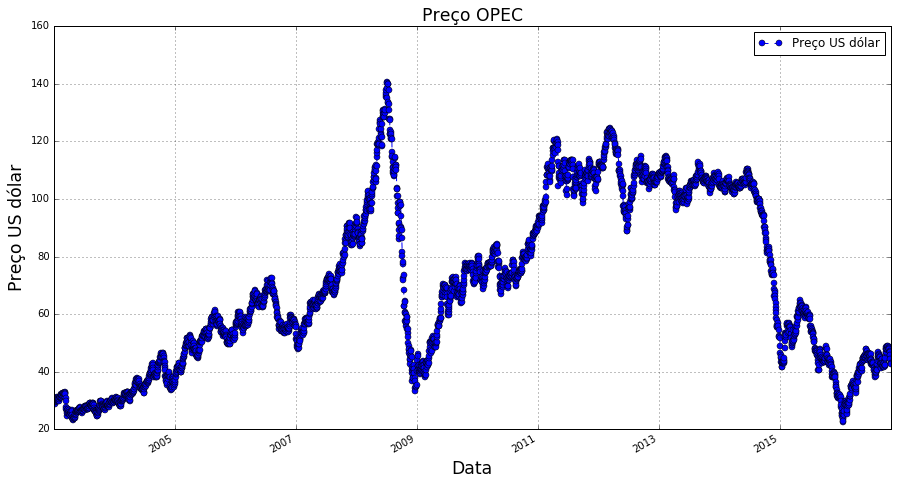

In [3]:
ax = db.plot(figsize=(15,8), marker="o", linestyle="--", grid=True)

ax.set_label(["Preço OPEC"] )
ax.set_ylabel("Preço US dólar", fontsize="xx-large")
ax.set_xlabel("Data", fontsize="xx-large")
ax.set_title("Preço OPEC", fontsize="xx-large")

ax.legend(["Preço US dólar"], loc=0)

plt.savefig("opec.pdf", format="pdf", ax = ax)

## Regressão Linear

$$ \text{min}_{w, b} \sum_i || w^\mathsf{T}x_i + b  - y_i||^2 $$

In [4]:
np.array(db)[:,0]

array([ 30.05,  30.83,  30.71, ...,  44.53,  43.12,  42.65])

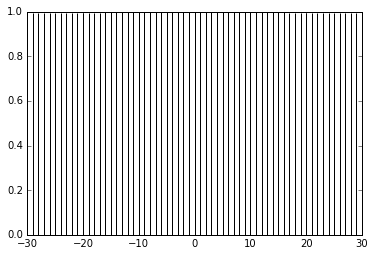

In [25]:
lags, c, line, b = plt.acorr(np.array(db)[:,0], maxlags=30)

In [48]:
db_shift = db.copy()
db_shift.drop("Value", axis=1, inplace=True)

db_shift["lag1"] = db.shift(1).fillna(0)
db_shift["lag2"] = db.shift(2).fillna(0)

#db_shift.head()
#db_shift.iloc[:,1]
y = np.array(db.iloc[:,:])
X = np.array(db_shift.iloc[:,:])
print(X.shape)

(3572, 2)


In [32]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(db_shift, db, random_state=5, train_size=60)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
np.any(np.isnan(X_test))
#np.all(np.isfinite(X_test))


(60, 2)
(60, 1)
(3512, 2)
(3512, 1)


False

In [33]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression


tscv = TimeSeriesSplit(n_splits=3)
train_score = list()
test_score = list()
for train_index, test_index in tscv.split(X):
        linear_regression = LinearRegression().fit(X[train_index,:], y[train_index])
        train_score.append(linear_regression.score(X[train_index, :], y[train_index, :]))
        train_score.append(linear_regression.score(X[train_index, :], y[train_index, :]))
        #print("R^2 on training set: %f" % linear_regression.score(X[train_index,:], y[train_index]))
        #print("R^2 on test set: %f" % linear_regression.score(X[test_index,:], y[test_index]))
               

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression

scores = list()

for split  in list(range(2,20)):
    tscv = TimeSeriesSplit(n_splits=split)
    lr = LinearRegression()
    score = cross_val_score(lr, X, y, cv=tscv, scoring="r2", n_jobs=4)
    scores.append(score.mean())

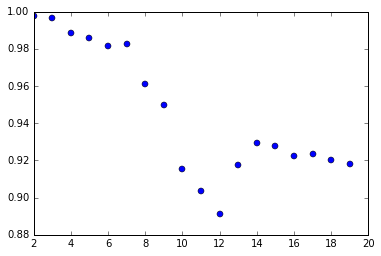

In [35]:
plt.plot(list(range(2,20)), scores, "o")

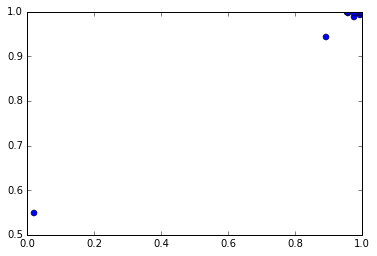

In [55]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression


tscv = TimeSeriesSplit(n_splits=12)
train_score = list()
test_score = list()
for train_index, test_index in tscv.split(X):
        linear_regression = LinearRegression().fit(X[train_index,:], y[train_index])
        train_score.append(linear_regression.score(X[train_index, :], y[train_index, :]))
        test_score.append(linear_regression.score(X[test_index, :], y[test_index, :]))
        #print("R^2 on training set: %f" % linear_regression.score(X[train_index,:], y[train_index]))
        #print("R^2 on test set: %f" % linear_regression.score(X[test_index,:], y[test_index]))
plt.plot(test_score, train_score, "o")


In [56]:
oil_lw = pd.read_csv("opec/data_17_11_2016.csv", index_col=0, parse_dates=True)
end = pd.to_datetime("2016-11-17")
start = pd.to_datetime("2016-11-03")
y = np.array(oil_lw[start:end])

oil_shift = oil_lw.copy()
oil_shift.drop("Value", axis=1, inplace=True)
oil_shift["lag1"] = oil_lw.shift(1).fillna(0)
oil_shift["lag2"] = oil_lw.shift(2).fillna(0)

x = np.array(oil_shift[start:end])


In [50]:
X

array([[  0.  ,   0.  ],
       [ 30.05,   0.  ],
       [ 30.83,  30.05],
       ..., 
       [ 45.83,  47.04],
       [ 44.53,  45.83],
       [ 43.12,  44.53]])

In [57]:
y_pred = linear_regression.predict(x)


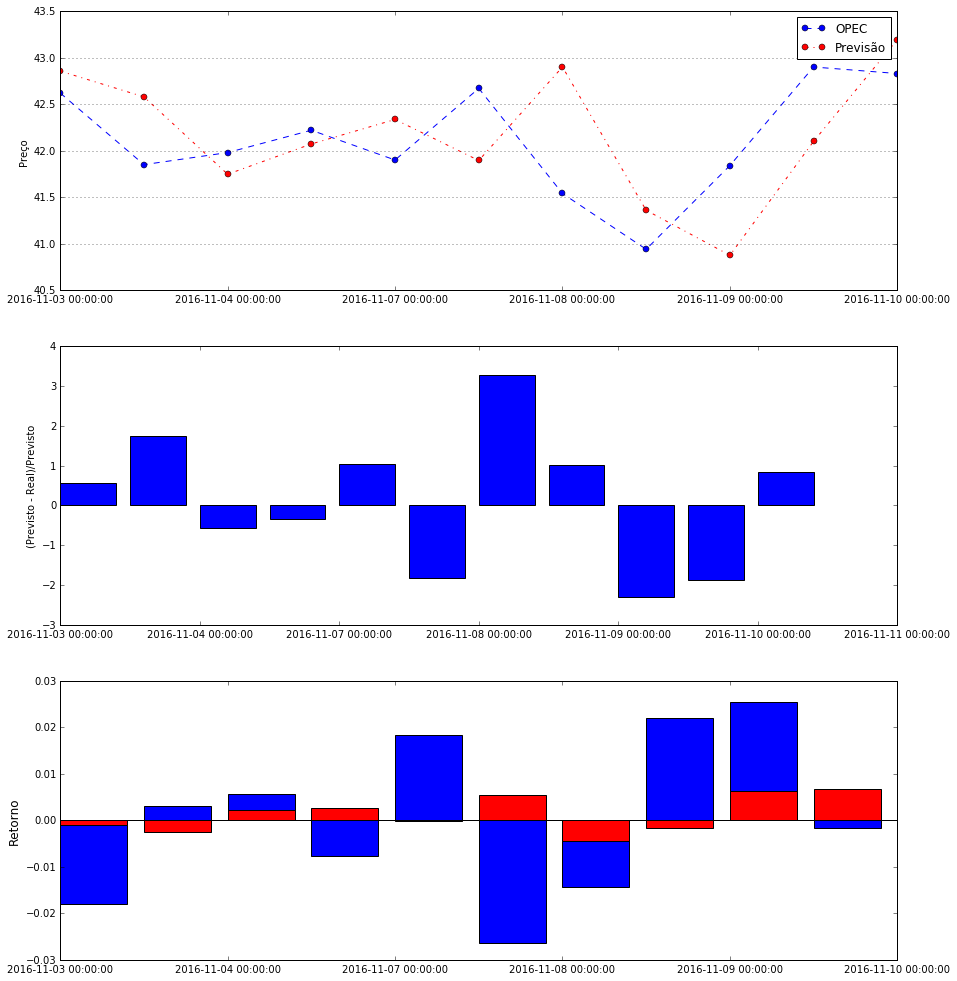

In [93]:
fig = plt.figure(figsize=(15,17))
ax1 = fig.add_subplot(3,1,1)
ax1.plot(y, color="b", marker="o", linestyle="--", label="OPEC")
ax1.plot(y_pred, color = "r", marker="o", linestyle="-.", label="Previsão")
ax1.set_ylabel("Preço")
ax1.grid(axis="y")
ax1.legend()
ax1.set_xticklabels(oil_lw[start:end].index)

ax2 = fig.add_subplot(3,1,2)
perc = ((y_pred-y)/y)*100
ax2.bar(range(len(perc)),perc, align= "edge")
ax2.set_ylabel("(Previsto - Real)/Previsto")
ax2.set_xticklabels(oil_lw[start:end].index)

ax3 = fig.add_subplot(3,1,3)

r_real=list()
r_pred = list()
for i in range(len(y[:])-1): 
    r_real.append((y[i+1][0]-y[i][0])/y[i])
    r_pred.append((y_pred[i+1][0]-y[i][0])/y[i])

ax3.bar(range(len(r_real)), r_real, color="b")
ax3.bar(range(len(r_pred)), r_pred, color="r")
ax3.axhline(0, c="k")
ax3.set_ylabel("Retorno", fontsize=12)
ax3.set_xticklabels(oil_lw[start:end].index)

plt.savefig("prevLinear.pdf", format="pdf",ax = ax)

In [87]:
oil_lw[start:end].index["%Y"]

ValueError: 

In [40]:
import rpy2
print(rpy2.__version__)

from rpy2.robjects.packages import importr
# import R's "base" package
base = importr('base')

# import R's "utils" package
utils = importr('utils')




2.8.3


In [41]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()

from rpy2.robjects import r

#import pandas.rpy.common as com
#r_dataframe = com.convert_to_r_dataframe(db_shift)
#print(type(r_dataframe))


In [42]:
from sklearn.metrics import r2_score
#print(r2_score(np.dot(X, true_coefficient), y))
ypred = linear_regression.coef_[0, 0]*X[:,0] + linear_regression.coef_[0,1]*X[:,1] + linear_regression.intercept_[0]

In [43]:
linear_regression.coef_[0,1]*X[:,1]

array([-9.67475665, -9.36827705, -9.26394357, -9.09657528, -9.12483227,
       -9.17699901, -9.10744335, -9.27481164, -9.02919324, -8.89877639,
       -9.09440167])

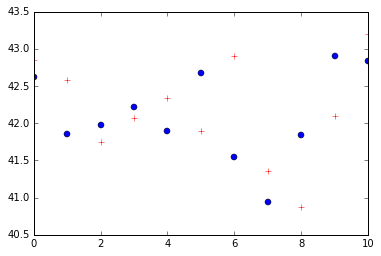

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y, "bo")
ax.plot(ypred, "r+")

In [45]:
ypred

array([ 42.85574101,  42.5787051 ,  41.74698244,  42.07238618,
        42.33588695,  41.89470987,  42.90032166,  41.3592606 ,
        40.87548461,  42.09999305,  43.19296453])